In [1]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [2]:
# Load your CSV file (adjust filename if needed)
df = pd.read_csv("cleaned_data_ready_for_ml.csv")

# Display first few rows and info
print(df.head())
print(df.info())


   job_title_salary_rank  company_size  experience_level_encoded  \
0                      8             3                         2   
1                      7             2                         3   
2                      7             2                         3   
3                      8             2                         3   
4                      8             2                         3   

   employment_type_encoded  work_year  salary_in_usd  
0                        1       2025          60000  
1                        1       2025         165000  
2                        1       2025         109000  
3                        1       2025         294000  
4                        1       2025         137600  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43301 entries, 0 to 43300
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   job_title_salary_rank     43301 non-null  

In [3]:
# Define the features and target column
features = ['experience_level_encoded', 'employment_type_encoded', 'job_title_salary_rank', 'company_size']
target = 'salary_in_usd'


In [4]:
# Label encode categorical variables
label_encoders = {}

for col in features:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoder if needed later


In [5]:
# Separate features and target
X = df[features]
y = df[target]

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# Create and train XGBoost model
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42
)

xgb_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [7]:
from sklearn.metrics import mean_squared_error
import numpy as np

y_pred = xgb_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # No 'squared' arg
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


RMSE: 58029.29
R² Score: 0.21


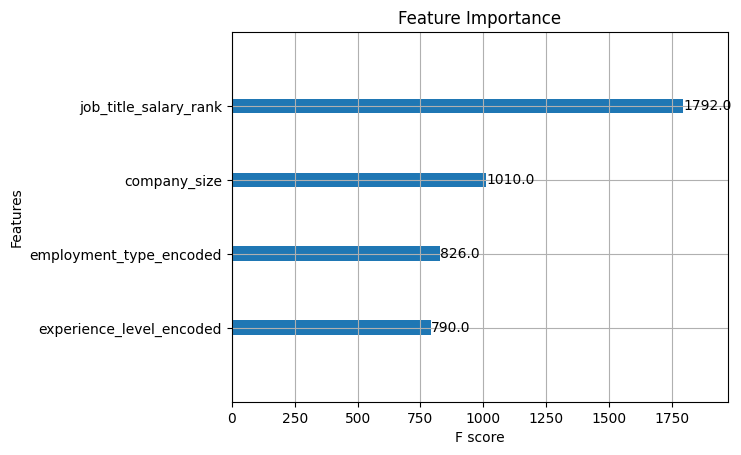

In [8]:
# Plot the feature importance
xgb.plot_importance(xgb_model)
plt.title("Feature Importance")
plt.show()
